In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
income = pd.read_csv('incomeclean.csv')
asthma = pd.read_csv('asthmabyzip.csv')

In [3]:
asthma.tail()

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county
19149,2013,96101,35,71.9,All Ages,Modoc
19150,2013,96122,33,85.9,All Ages,Plumas
19151,2013,96130,76,36.6,All Ages,Lassen
19152,2013,96150,60,19.1,All Ages,El Dorado
19153,2013,96161,17,7.6,All Ages,Nevada


In [4]:
# counties = asthma["county"].unique()
# counties
newasthma = asthma.loc[asthma.county.isin(['Los Angeles', 'Orange', 'Ventura', 'San Bernardino', 'Riverside', 'San Diego'])]

#asthma = asthma[(asthma['county']=='Los Angeles') | (asthma['county']=='Orange') | (asthma['county']=='Riverside') | 
            #(asthma['county']=='Ventura') | (asthma['county']=='San Bernadino') | (asthma['county']=='San Diego')]
newasthma['county'].unique()
newasthma.to_csv('asthmacountyzip.csv')

In [5]:
#asthma = asthma[(['Year'] == 2017)]
asthma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19154 entries, 0 to 19153
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              19154 non-null  int64  
 1   Zip_Code                          19154 non-null  int64  
 2   Number_of_Asthma_ED_Visits        19154 non-null  int64  
 3   Age_Adjusted_Rate_of_Asthma_ED_V  19154 non-null  float64
 4   Age_Group                         19154 non-null  object 
 5   county                            19154 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 898.0+ KB


In [6]:
asthma['Year'].describe()

count    4072.000000
mean     2015.489440
std         1.708386
min      2013.000000
25%      2014.000000
50%      2015.000000
75%      2017.000000
max      2018.000000
Name: Year, dtype: float64

In [7]:
current = asthma['Year'] > 2015
current.head()

93    True
94    True
95    True
96    True
97    True
Name: Year, dtype: bool

In [8]:
asthma = asthma[current]
asthma.head()

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county
93,2018,90620,57,57.1,0-17,Orange
94,2018,90621,56,58.4,0-17,Orange
95,2018,90623,21,74.5,0-17,Orange
96,2018,90630,32,33.8,0-17,Orange
97,2018,90631,95,55.9,0-17,Orange


In [9]:
asthma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025 entries, 93 to 8950
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              2025 non-null   int64  
 1   Zip_Code                          2025 non-null   int64  
 2   Number_of_Asthma_ED_Visits        2025 non-null   int64  
 3   Age_Adjusted_Rate_of_Asthma_ED_V  2025 non-null   float64
 4   Age_Group                         2025 non-null   object 
 5   county                            2025 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 94.9+ KB


In [10]:
income.head()

,Unnamed: 0,Zip Code,City,County,Income
0,0,90001,Los Angeles,Los Angeles,35976.98061
1,1,90002,Los Angeles,Los Angeles,35976.98061
2,2,90003,Los Angeles,Los Angeles,35976.98061
3,3,90004,Los Angeles,Los Angeles,35976.98061
4,4,90005,Los Angeles,Los Angeles,35976.98061


In [11]:
income.rename(columns={'Zip Code': 'Zip_Code'}, inplace=True)
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1012 non-null   int64  
 1   Zip_Code    1012 non-null   int64  
 2   City        1012 non-null   object 
 3   County      1012 non-null   object 
 4   Income      855 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 31.7+ KB


In [12]:
merged = pd.merge(income, asthma, on='Zip_Code')
merged.head()

,Unnamed: 0,Zip_Code,City,County,Income,Year,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county
0,195,90620,Buena Park,Orange,69786.41129,2018,57,57.1,0-17,Orange
1,195,90620,Buena Park,Orange,69786.41129,2018,85,23.3,18+,Orange
2,195,90620,Buena Park,Orange,69786.41129,2018,142,32.0,All Ages,Orange
3,195,90620,Buena Park,Orange,69786.41129,2017,66,66.3,0-17,Orange
4,195,90620,Buena Park,Orange,69786.41129,2017,112,29.9,18+,Orange


In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 0 to 2015
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2016 non-null   int64  
 1   Zip_Code                          2016 non-null   int64  
 2   City                              2016 non-null   object 
 3   County                            2016 non-null   object 
 4   Income                            1761 non-null   float64
 5   Year                              2016 non-null   int64  
 6   Number_of_Asthma_ED_Visits        2016 non-null   int64  
 7   Age_Adjusted_Rate_of_Asthma_ED_V  2016 non-null   float64
 8   Age_Group                         2016 non-null   object 
 9   county                            2016 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 141.8+ KB


In [14]:
merged.drop(['Unnamed: 0'], axis = 1, inplace = True)
#merged.drop(['county'], axis = 1, inplace = True)
merged.head()

,Zip_Code,City,County,Income,Year,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county
0,90620,Buena Park,Orange,69786.41129,2018,57,57.1,0-17,Orange
1,90620,Buena Park,Orange,69786.41129,2018,85,23.3,18+,Orange
2,90620,Buena Park,Orange,69786.41129,2018,142,32.0,All Ages,Orange
3,90620,Buena Park,Orange,69786.41129,2017,66,66.3,0-17,Orange
4,90620,Buena Park,Orange,69786.41129,2017,112,29.9,18+,Orange


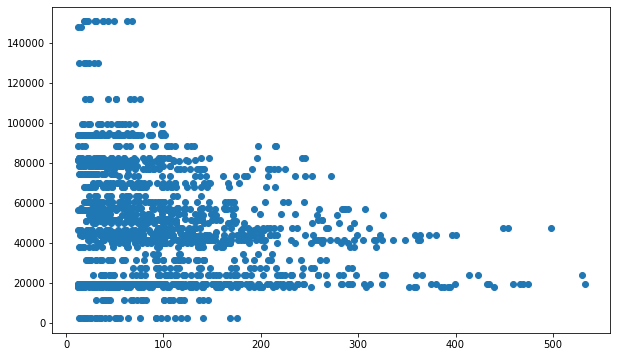

In [15]:
plt.scatter(merged['Number_of_Asthma_ED_Visits'], merged['Income'])
plt.show()

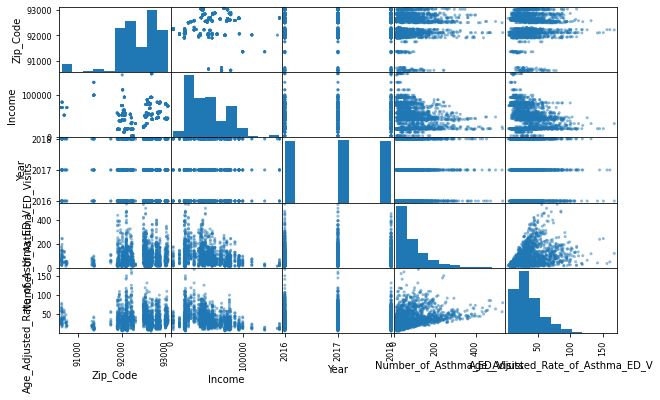

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(merged)
print()

In [19]:
zip90620 = merged['Zip_Code']==90620
merged[zip90620]

,Zip_Code,City,County,Income,Year,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county
0,90620,Buena Park,Orange,69786.41129,2018,57,57.1,0-17,Orange
1,90620,Buena Park,Orange,69786.41129,2018,85,23.3,18+,Orange
2,90620,Buena Park,Orange,69786.41129,2018,142,32.0,All Ages,Orange
3,90620,Buena Park,Orange,69786.41129,2017,66,66.3,0-17,Orange
4,90620,Buena Park,Orange,69786.41129,2017,112,29.9,18+,Orange
5,90620,Buena Park,Orange,69786.41129,2017,178,39.3,All Ages,Orange
6,90620,Buena Park,Orange,69786.41129,2016,67,68.0,0-17,Orange
7,90620,Buena Park,Orange,69786.41129,2016,99,29.2,18+,Orange
8,90620,Buena Park,Orange,69786.41129,2016,166,39.2,All Ages,Orange


In [20]:
allages = merged['Age_Group']=='All Ages'
merged = merged[allages]
merged.head()

,Zip_Code,City,County,Income,Year,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county
2,90620,Buena Park,Orange,69786.41129,2018,142,32.0,All Ages,Orange
5,90620,Buena Park,Orange,69786.41129,2017,178,39.3,All Ages,Orange
8,90620,Buena Park,Orange,69786.41129,2016,166,39.2,All Ages,Orange
11,90621,Buena Park,Orange,69786.41129,2018,130,34.7,All Ages,Orange
14,90621,Buena Park,Orange,69786.41129,2017,148,40.7,All Ages,Orange


In [21]:
merged.drop(['county'], axis = 1, inplace = True)
merged.drop(['Age_Group'], axis =1, inplace=True)

In [22]:
year2018 = merged['Year']==2018